In [1]:
from os import listdir
import os, contextlib
import sys
sys.path.append('../..')

import exp_test_quarantine
import numpy as np

import pandas as pd
from matplotlib.pyplot import *

from statsmodels.robust import mad

from IPython.display import display
pd.set_option('display.expand_frame_repr', False)


In [2]:
my_parser = exp_test_quarantine.argument_parser()
defaults = vars(my_parser.parse_args(""))
print(defaults)

{'S': 1000, 'T': 40, 'p0': 0.0001, 'p1': 0.025, 'alpha': 0.001, 'beta': 0.01, 'R0': 2.5, 'policy_start': 30, 'test_capacity': 0.01, 'qDays': 14, 'pDays': 5, 'pEI_threshold': 0.3, 'pSR_threshold': 0.7, 'seed': 42, 'iteration': 0, 'interactive': 'on', 'policy': 'contact'}


In [3]:
#directory = 'experiments/exp_5.2'
directory = '.'

In [4]:


def process( dir, args) :
    traces = np.genfromtxt(f'{directory}/{dir}/traces.csv', delimiter=',')
    qstats = np.genfromtxt(f'{directory}/{dir}/qstats.csv', delimiter=',')

    tmp = traces.cumsum(1)==args['T']-1

    res = { 'PS': tmp[:,0].mean(),
            'PE': (~tmp[:,0] & tmp[:,1]).mean(),
            'PI': (~tmp[:,0] & ~tmp[:,1] & tmp[:,2]).mean(),
            'PR': (~tmp[:,2]).mean(),
            'QS': qstats[:,0].sum(),
            'QE': qstats[:,1].sum(),
            'QI': qstats[:,2].sum(),
            'QR': qstats[:,3].sum(),
            'Q' : qstats.sum(),
            }
    return res

In [5]:
rows = []

for cmd in listdir(directory):
    try:
        args = cmd.replace("_"," ")
        with open(os.devnull, 'w') as devnull:
            with contextlib.redirect_stderr(devnull):
                args = vars(my_parser.parse_args(args.split()))
        res = process(cmd, args)
        rows.append({**args, **res})

    except SystemExit:
        print("error parsing {}, ignored".format(cmd) )

df = pd.DataFrame(rows)

error parsing experiment52.png, ignored
error parsing .DS_Store, ignored
error parsing Makefile, ignored
error parsing __pycache__, ignored
error parsing results, ignored
error parsing analyse_results.ipynb, ignored
error parsing exp_test_quarantine.py, ignored
error parsing .ipynb_checkpoints, ignored


In [6]:
iterations = ['iteration','seed']

results = [k for k in df.keys() if k not in defaults]
args = [k for k in defaults.keys() if k not in iterations]


print("iterations: ", iterations)
print("results: ", results)
print("args: ", args)


iterations:  ['iteration', 'seed']
results:  ['PE', 'PI', 'PR', 'PS', 'Q', 'QE', 'QI', 'QR', 'QS']
args:  ['S', 'T', 'p0', 'p1', 'alpha', 'beta', 'R0', 'policy_start', 'test_capacity', 'qDays', 'pDays', 'pEI_threshold', 'pSR_threshold', 'interactive', 'policy']


In [7]:
df_pivot = pd.pivot_table(df,
                          values = results,
                          index = args,
                          aggfunc=['count',np.mean, np.std, np.median, mad])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_pivot)

count                                     mean                                                                                  std                                                                                               median                                                                          mad                                                                                            
                                                                                                                                PE  PI  PR  PS   Q  QE  QI  QR  QS       PE       PI       PR       PS          Q      QE       QI       QR         QS        PE        PI        PR        PS            Q         QE           QI           QR           QS      PE      PI      PR      PS         Q     QE      QI      QR        QS        PE        PI        PR        PS            Q         QE           QI          QR           QS
S    T   p0     p1    alpha beta R0  policy_start test_capacity qDays pDays pEI_threshold pSR_threshold interactive policy                                                                                                                                                                                                                                                                                                                                                                                                                    
1000 150 0.0001 0.025 0.001 0.01 2.5 30           0.01          2     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.01290  0.09665  0.72340  0.16705     790.65    0.00   790.65     0.00       0.00  0.014116  0.058801  0.158386  0.093600   111.280714   0.000000   111.280714     0.000000     0.000000  0.0100  0.0810  0.7660  0.1425     816.0    0.0   816.0     0.0       0.0  0.008896  0.033359  0.083026  0.024463    48.184572   0.000000    48.184572    0.000000     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.02255  0.11170  0.40200  0.46375   14777.45  391.05  2154.05  2228.05   10004.30  0.005266  0.015553  0.059448  0.055393  1136.568727  63.150176   243.363379   488.742691   504.126248  0.0215  0.1115  0.4025  0.4580   14935.5  397.0  2183.0  2216.0   10166.5  0.004448  0.012602  0.044478  0.048185   907.352558  74.871412   185.325277  170.499255   284.659626
                                                                7     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.02155  0.12445  0.58260  0.27140    2339.05    0.00  2338.40     0.65       0.00  0.011161  0.044974  0.131617  0.084294   356.288097   0.000000   356.158214     0.875094     0.000000  0.0160  0.1190  0.6135  0.2440    2423.0    0.0  2422.0     0.0       0.0  0.008896  0.057821  0.112678  0.042995   261.679292   0.000000   260.196689    0.000000     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.01130  0.04600  0.18540  0.75730   18216.45  193.55  1625.70  1609.05   14788.15  0.004342  0.015668  0.072023  0.080985  5338.773104  86.947943   589.552739   906.419937  3880.732992  0.0110  0.0435  0.1870  0.7480   18571.5  207.0  1701.0  1435.0   15281.5  0.005189  0.015567  0.071906  0.081543  4401.845987  97.851746   592.299586  810.983414  2960.015329
                                                                14    5     0.2           0.95          off         score       20  20  20  20  20  20  20  20  20  0.00555  0.02130  0.08020  0.89295   16605.60   26.90   944.25   658.50   14975.95  0.005577  0.015977  0.027708  0.041307   241.801441  13.878799   348.284045   218.825934   639.445111  0.0040  0.0175  0.0785  0.9005   16586.5   23.5   871.5   639.5   15127.0  0.004448  

In [8]:
filter = {'S':1000, 'T':150, 'p0':0.0001, 'p1':0.025, 'alpha':0.001, 'beta': 0.01, 'R0':2.5, 
          'policy_start':30, 'test_capacity':0.01 }

idx = np.r_[[df_pivot.index.get_level_values(k)==v for k,v in filter.items()]].all(0)


df_52 = df_pivot[idx]

display(df_52)

count                                     mean  ...    median       mad                                                                                            
                                                                                                                                PE  PI  PR  PS   Q  QE  QI  QR  QS       PE  ...        QS        PE        PI        PR        PS            Q         QE           QI          QR           QS
S    T   p0     p1    alpha beta R0  policy_start test_capacity qDays pDays pEI_threshold pSR_threshold interactive policy                                                   ...                                                                                                                
1000 150 0.0001 0.025 0.001 0.01 2.5 30           0.01          2     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.01290  ...       0.0  0.008896  0.033359  0.083026  0.024463    48.184572   0.000000    48.184572    0.000000     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.02255  ...   10166.5  0.004448  0.012602  0.044478  0.048185   907.352558  74.871412   185.325277  170.499255   284.659626
                                                                7     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.02155  ...       0.0  0.008896  0.057821  0.112678  0.042995   261.679292   0.000000   260.196689    0.000000     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.01130  ...   15281.5  0.005189  0.015567  0.071906  0.081543  4401.845987  97.851746   592.299586  810.983414  2960.015329
                                                                14    5     0.2           0.95          off         score       20  20  20  20  20  20  20  20  20  0.00555  ...   15127.0  0.004448  0.014085  0.034841  0.045219   240.181559  13.343420   469.243602  184.583976   651.603675
                                                                            0.3           0.70          off         lockdown    20  20  20  20  20  20  20  20  20  0.00055  ...  116697.5  0.000000  0.001483  0.008896  0.009637     0.000000  23.721635   153.449330  982.965271  1070.438802
                                                                                                                    no          20  20  20  20  20  20  20  20  20  0.01215  ...       0.0  0.003707  0.031135  0.033359  0.018533     0.000000   0.000000     0.000000    0.000000     0.000000
                                                                                                                    symptom     20  20  20  20  20  20  20  20  20  0.02180  ...       0.0  0.007413  0.010378  0.146036  0.129728   841.376759   0.000000   799.863897   28.169442     0.000000
                                                                                          0.95          off         score       20  20  20  20  20  20  20  20  20  0.00580  ...   10654.0  0.002965  0.010378  0.048926  0.070424   306.898659   8.154312   491.482635  356.565834   520.393379
                                                                            0.4           0.95          off         score       20  20  20  20  20  20  20  20  20  0.01040  ...    1678.5  0.005930  0.022239  0.083767  0.077095  1062.284490   5.189108   801.346499  350.635425   401.043900
                                                                            0.5           0.95          off         score       20  20  20  20  20  20  20  20  20  0.01215  ...     270.5  0.005930  0.023722  0.111195  0.112678  1645.688463   0.000000  1079.334415  538.925906    21.497732
                                                                      7     0.3

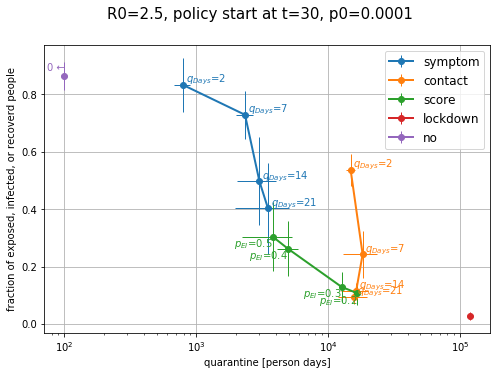

In [9]:
mu='mean'
si='std'

fig = figure(figsize=(8,5.3))
policies = df_52.index.unique('policy').values

for policy in policies:
    
    idx = df_52.index.get_level_values('policy').values==policy

    qDays = df_52.loc[idx].index.get_level_values('qDays').values
    pEI_threshold = df_52.loc[idx].index.get_level_values('pEI_threshold').values
        
    x,y = df_52[idx][mu][['Q','PS']].values.T
    xd,yd = df_52[idx][si][['Q','PS']].values.T


    if policy=='no':
        x+=100
    y = 1-y

    eb=errorbar(x,y,xerr=xd, yerr=yd, 
                fmt='-o', linewidth=2, elinewidth=1)

    if policy in ['contact','symptom']:
        for x,y,z in zip(x,y,qDays): 
            text(x*1.05,y+0.01, "$q_{{Days}}$={}".format(z),color=eb[0].get_color())
            
    if policy in ['score']:
        for x,y,z in zip(x,y,pEI_threshold): 
            text(x,y,"$p_{{EI}}$={}".format(z),
                     ha='right',  va='top', color=eb[0].get_color())
            

    if policy in ['no']:
        text(x[0],y[0]+0.02, "0 ←", ha='right', color=eb[0].get_color())
    

gca().set_xscale('log')
grid(True)

legend(policies)

xlabel('quarantine [person days]',fontsize=10)
ylabel('fraction of exposed, infected, or recoverd people',fontsize=10)
legend(policies,fontsize=12)
grid(True)
suptitle("R0={}, policy start at t={}, p0={}".format(filter['R0'], filter['policy_start'],filter['p0']),
         fontsize=15)

fig.savefig('experiment52.png')